In [1]:
import numpy as np
import matplotlib.pyplot as plt
DATA_PATH = '../data/training/'

Verify that the data is correct by visual inspection of the matched patches.

In [2]:
# load data
patches = np.load(DATA_PATH + 'patches.npy')
labels = np.load(DATA_PATH + 'labels.npy')
negatives = np.load(DATA_PATH + 'negatives.npy')

In [95]:
# take random index
idx = np.random.randint(0, len(labels))
# visualize patch and subsequent matches
p = [patches[idx]]
while idx < len(labels):
    idx = labels[idx]
    p.append(patches[idx])
print('Number of matches: {}'.format(len(p)))

Number of matches: 5


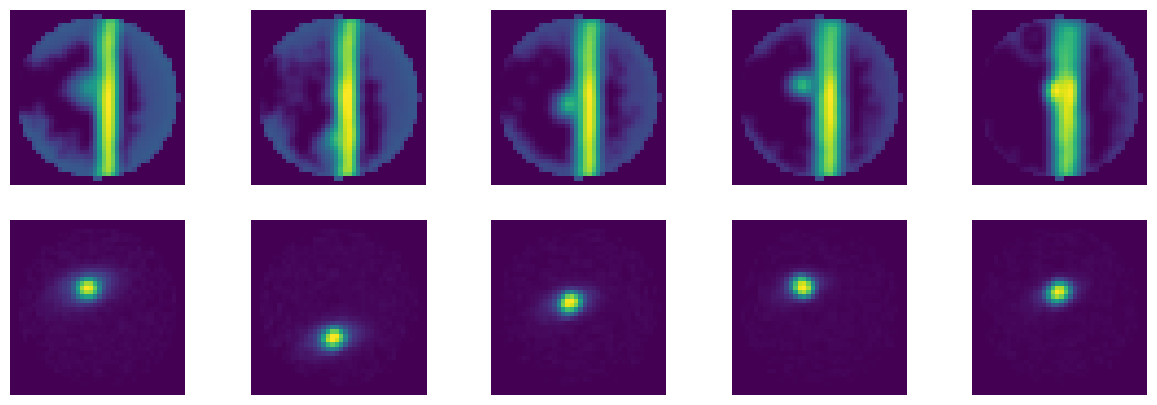

In [96]:
# plot
fig, ax = plt.subplots(2, len(p), figsize=(15, 5))
for i, patch in enumerate(p):
    ax[0,i].imshow(patch[0])
    ax[0,i].axis('off')
    ax[1,i].imshow(patch[1])
    ax[1,i].axis('off')